# Pymaceuticals Inc.
---

### Analysis

The bar charts show the drugs Capomulin and Ramicane have a larger number of mice tested.  Of said mice, there is an almost equal number of mice in each gender, 51% male and 49% female.  

The box and whisker plot indicates the drugs Capomulin and Ramicane have a greater effect on the tumor volume compared to Infubinol and Ceftamin. 

When looking at tumor volume in comparison to the mouse’s weight, there is a positive correlation of 84% indicating that the more the mouse weighs, the larger the tumor is.  As the tumor volume decreased, the mouse weight also decreased. 

These are positive results for Capomulin, showing the drug is an effective treatment for tumor deduction. 

 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, how= "left", on = "Mouse ID")

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
# Checking the number of mice.
mice_data = total_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [92]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
unique_mouse_id=duplicate_mice ["Mouse ID"].unique()
unique_mouse_id

array(['g989'], dtype=object)

In [93]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data= total_data[total_data["Mouse ID"]==unique_mouse_id[0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = total_data.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [95]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_data["Mouse ID"].unique()
clean_number_of_mice = len(mice_data)
clean_number_of_mice

249

## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_data=clean_data.set_index(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_std_dev=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_vol_std_sem=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({"Mean Tutor Volume": mean_tumor_volume,
                                     "Median Tumor Volume":median_tumor_volume,
                                     "Tumor Volume Variance": tumor_variance,
                                     "Tumor Volume Standard Deviation": Tumor_std_dev,
                                     "SEM of the tumor volume": Tumor_vol_std_sem})
drug_regimen_summary


,Mean Tutor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,SEM of the tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen_Summary_df = drug_regimen_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_regimen_Summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

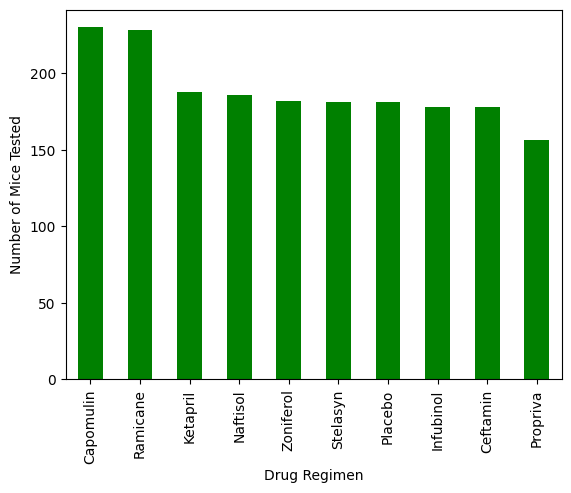

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugged_mice=clean_data[["Drug Regimen", "Timepoint"]]
mice_per_drug= drugged_mice["Drug Regimen"].value_counts()
mice_per_drug
mice_per_drug.plot(kind="bar", color="g", xlabel="Drug Regimen", ylabel="Number of Mice Tested")

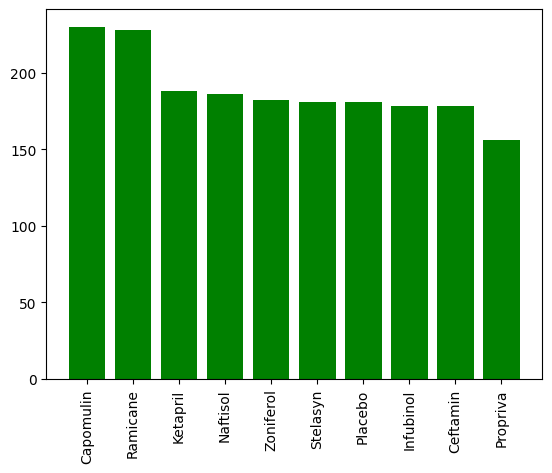

In [99]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values

plt.bar(drugs, count, color="g", align="center")
plt.xlabel=("Drug Regimen")
plt.ylabel=("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()


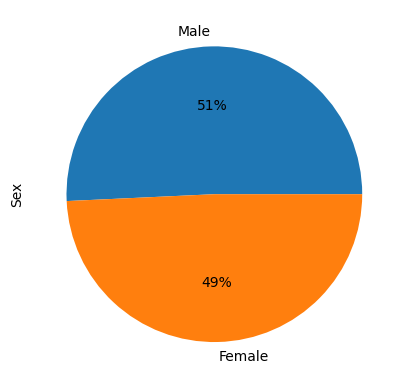

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_data["Sex"].value_counts()
Sex = ["Male", "Female"]
male_v_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()


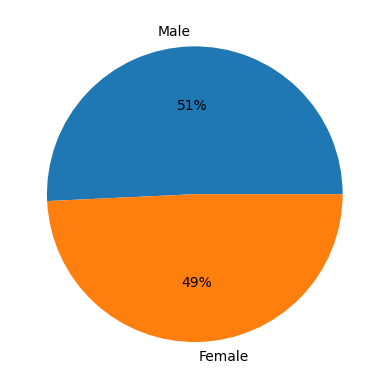

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplt
sex_label = male_v_female.index.values
count_value = male_v_female.values
plt.ylabel=("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_data.groupby(["Drug Regimen","Mouse ID"]).max()["Timepoint"]
new_last_tp = last_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data_lasttp = clean_data.merge(last_tp, how="right", on=["Mouse ID", "Timepoint"])
merged_data_lasttp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
244,q633,45,70.827796,2,Zoniferol,Male,12,25
245,s337,45,62.109651,4,Zoniferol,Male,14,27
246,w140,5,47.717952,0,Zoniferol,Female,19,30
247,w575,45,68.401286,3,Zoniferol,Female,16,28


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data_lasttp.loc[merged_data_lasttp['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")



For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


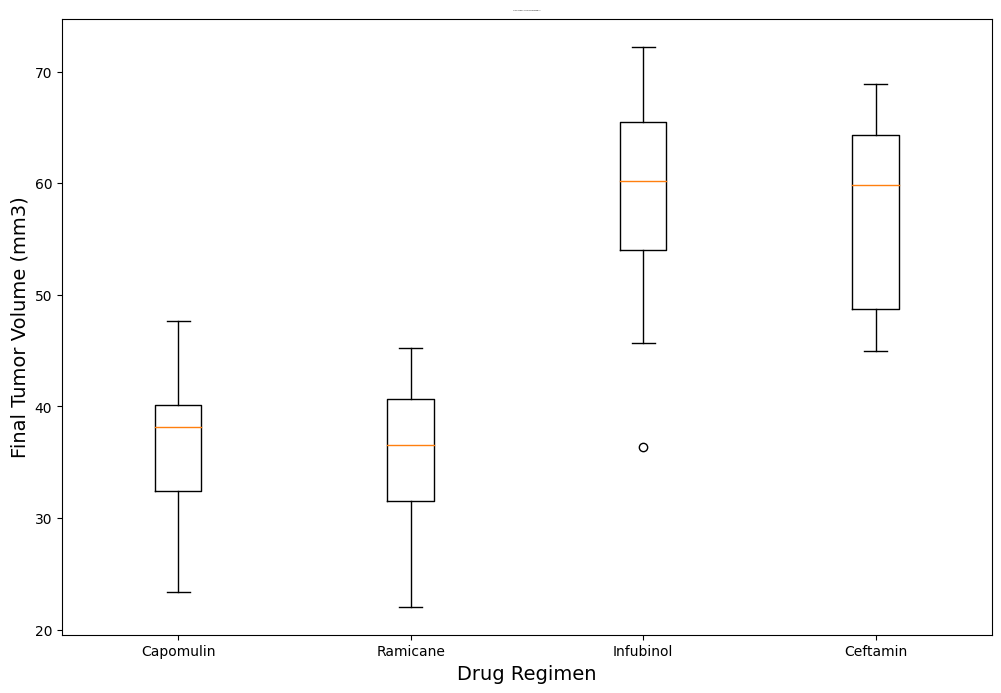

In [104]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =1)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.2, vert=True)

plt.savefig("pyplot_boxplot_final_tumor_vol.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [105]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#create dataframe with only Capomulin 
capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "b742") ]
tumor_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
tumor_capomulin_df = tumor_capomulin_df.set_index(["Timepoint"])
#variables for graph
x_axis=tumor_capomulin_df.index.values
y_axis = tumor_capomulin_df.values
#build graph and display
plt.plot=(x_axis, y_axis)
plt.title=("Mouse b742 on Capomulin")
plt.xlabel=("Timepoint in Days")
plt.ylabel=("Tumor Volume (mm3)")
plt.savefig("mouse_Capomulin_line_plot.png", bbox_inches = "tight")
plt.show()

<Figure size 640x480 with 0 Axes>

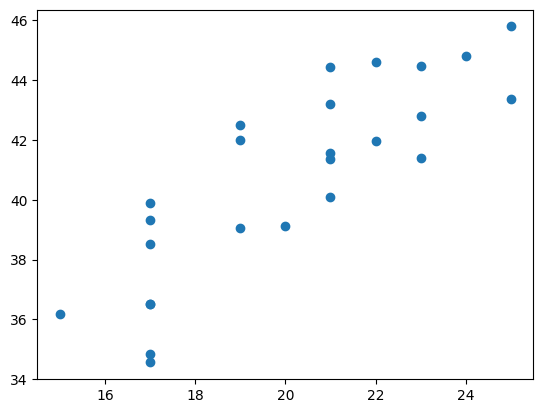

In [106]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin2_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = capomulin2_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel=("Weight (g)")
plt.ylabel=("Tumor Volume (mm3)")
plt.savefig("Capomulin_line_plot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


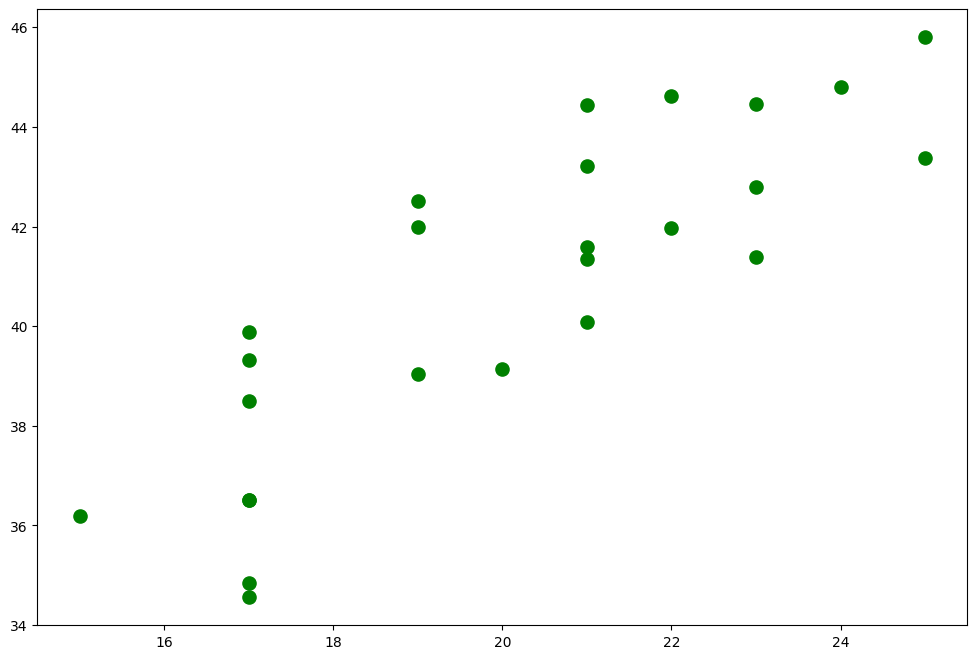

In [107]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(avg_capomulin_df['Weight (g)'],avg_capomulin_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")
fig2, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_capomulin_df["Weight (g)"],avg_capomulin_df["Tumor Volume (mm3)"],s=90, color="green")
plt.title=("Correlation between Mouse weight & Average Tumor Volume")
plt.xlabel=("Weight (g)")
plt.ylabel=("Average Tumor Volume (mm3)")

# plt.savefig("./Images/corr_scatterplot.png", bbox_inches = "tight")
plt.show()

In [108]:
# Add liniar regression equation and line to the scatter plot
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


KeyError: 'Weight (g)'

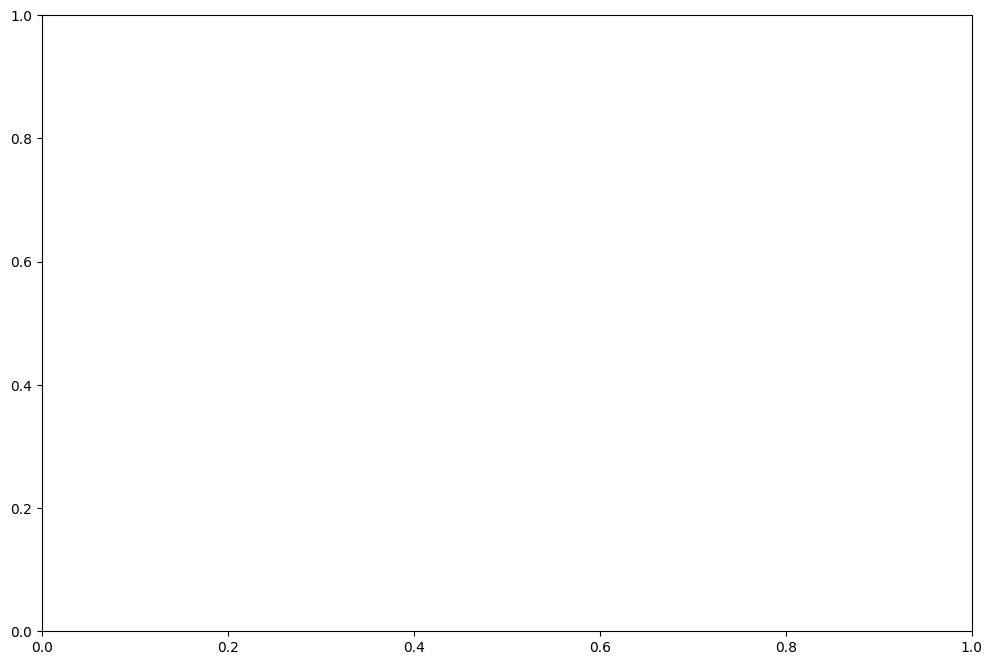

In [109]:
fig2, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"],s=90, color="green")
plt.title=("Correlation between Mouse weight & Average Tumor Volume")
plt.xlabel=("Weight (g)")
plt.ylabel=("Average Tumor Volume (mm3)")

# plt.savefig("./Images/corr_scatterplot.png", bbox_inches = "tight")
plt.show()



NameError: name 'slope' is not defined